# Машинное обучение (семинары)

## Урок 9. Ансамбли на практике

Ваша задача — реализовать алгоритм случайного леса для задачи классификации и применить его к набору данных.

Шаги выполнения задания:

1. Импортируйте необходимые библиотеки: numpy, pandas, sklearn.

2. Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

3. Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

4. Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

5. Обучите вашу модель случайного леса на обучающей выборке.

6. Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

7. Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.

##### 1. Импортируйте необходимые библиотеки: numpy, pandas, sklearn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##### 2. Загрузите набор данных для задачи классификации. Вы можете использовать любой доступный набор данных или выбрать один из популярных, таких как Iris, Wine или MNIST.

In [2]:
# # Скачиваем датасет
# from pathlib import Path
# import opendatasets as od

# dataset_path = Path('uciml/iris')
# # Проверяем существование директории с датасетом
# if not dataset_path.is_file():
#     od.download('https://www.kaggle.com/datasets/uciml/iris/data')

In [2]:
# Загрузка данных из файла
iris_df = pd.read_csv('iris/Iris.csv')

In [4]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##### 3. Проведите предварительную обработку данных, включая масштабирование и разделение на обучающую и тестовую выборки.

In [5]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Информация об атрибутах (по порядку):

Id - Порядковый номер, индивидуальный индефикатор

SepalLengthCm - Длина чашелистика (sepal length) в сантиметрах

SepalWidthCm - Ширина чашелистика (sepal width) в сантиметрах

PetalLengthCm - Длина лепестка (petal length) в сантиметрах

PetalWidthCm - Ширина лепестка (petal width) в сантиметрах

Species - Вид/тип цветка

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Из общей информации iris_df следует:
1. DataFrame содержит 150 записей (от индекса 0 до 149)
2. Всего 6 колонок
3. Нулевые значения отсуствуют
4. Нет пропущеных записей в колонках
5. Колонки SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm в формате float64
6. Колонка Species в формате object 

In [7]:
# Статистический анализ числовых переменных
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [8]:
# Статистический анализ объектных переменных
iris_df.describe(include='object').T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


In [9]:
duplicate_iris_df = iris_df[iris_df.duplicated()]
print("number of duplicate rows: ", duplicate_iris_df.shape)

number of duplicate rows:  (0, 6)


Дубликатов не обнаружено.

In [10]:
# Проверка на NaN значения
iris_df.isnull().any().any()

False

In [11]:
# Проверка на нулевые значения
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Пропущеных значений и NaN не обнаружено. 

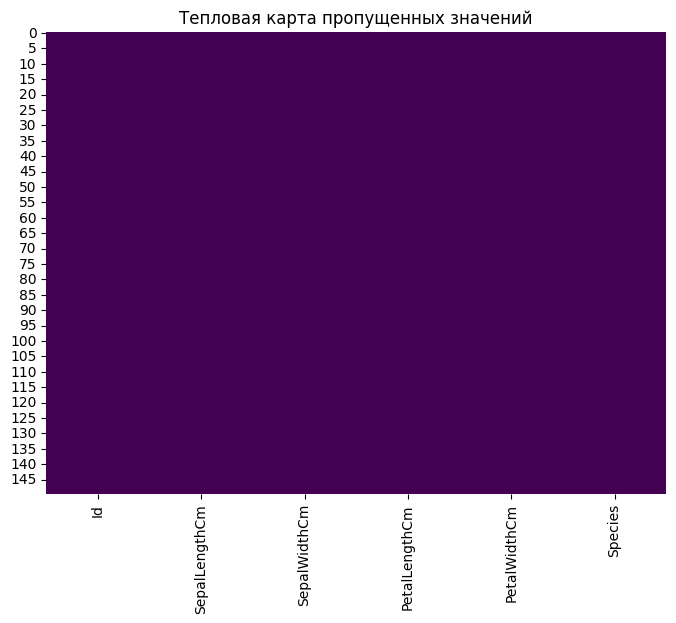

In [12]:
# Визуализация пропущенных значений (тепловая карта)
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.show()

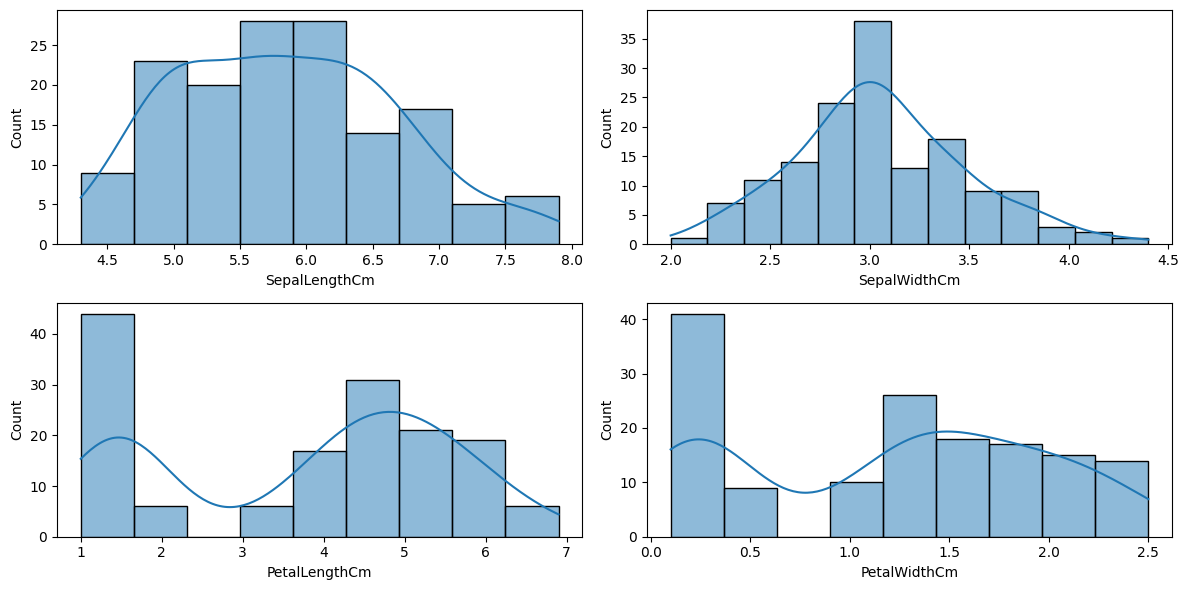

In [13]:
# Визуализация гистограмм
plt.figure(figsize=(12, 6))
for i, column in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris_df[column], kde=True)

plt.tight_layout()
plt.show()

C:\Users\Esdesu\AppData\Local\Temp\ipykernel_5068\1360235048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=iris_df, palette='Set2')


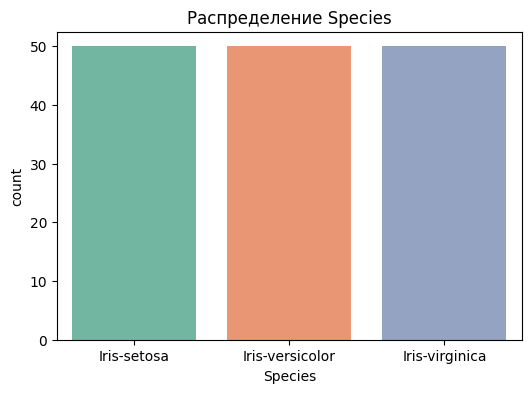

In [14]:
# Проверка баланса категириональных признаков
plt.figure(figsize=(6, 4))
sns.countplot(x='Species', data=iris_df, palette='Set2')
plt.title("Распределение Species")
plt.show()

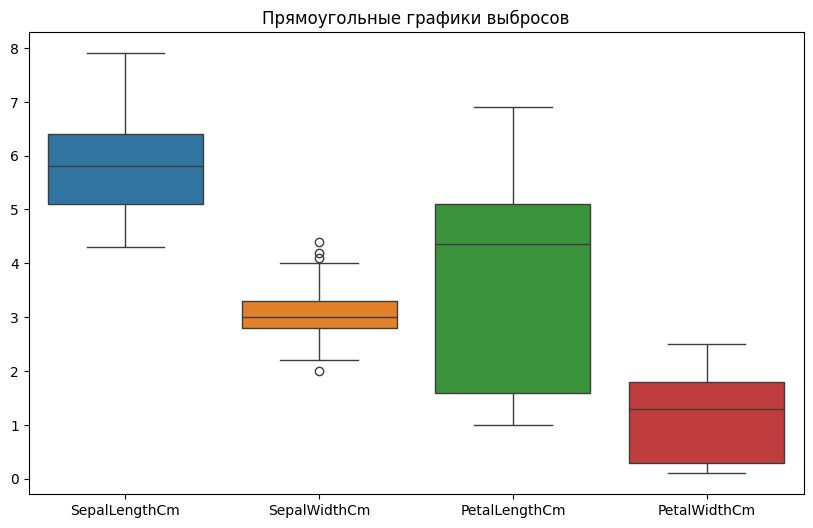

In [15]:
# Прямоугольные графики для визуализации распределений и потенциальных выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
plt.title("Прямоугольные графики выбросов")
plt.show()

В SepalWidthCm есть не большие выбросы, но мы пока мы не будем их трогать.

In [16]:
# Удаляем столбец Id поскольку он для работы нам не нужен
iris_df = iris_df.drop('Id', axis=1)

In [17]:
# Подготавливаем столбец Species перед обученим модели
# Приводим обектные значения к интовым
mapDiag = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_df['Species'] = iris_df['Species'].map(mapDiag)

print(f"Кодировка", mapDiag)

Кодировка {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


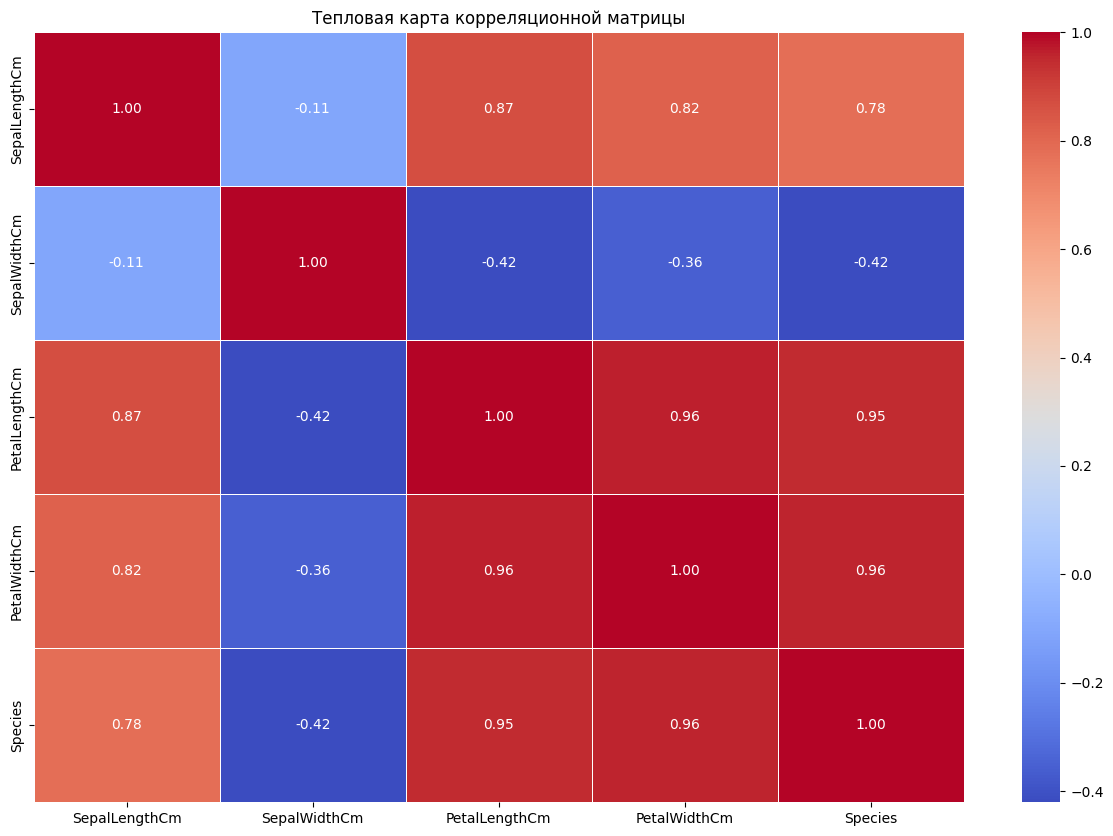

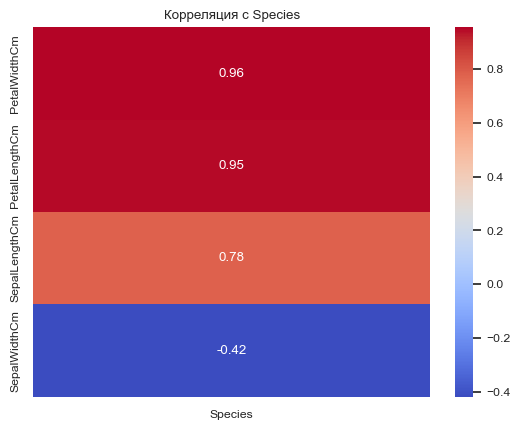

In [18]:
# Вычисляем корреляционную матрицу для обработанного DataFrame
correlation_matrix = iris_df.corr()

# Настраиваем размеры тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

# Вычисляем корреляцию между всеми переменными и сохраняем в переменной corr
corr = iris_df.corr()
target_corr = corr['Species'].drop('Species')

# Сортируем корреляции по убыванию
target_corr_sorted = target_corr.sort_values(ascending=False)

# Настраиваем параметры визуализации для тепловой карты
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с Species')
plt.show()

In [19]:
# Проверяем столбцы в DF
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# DataFrame iris
# Определение независимых и зависимых переменных
X_iris = iris_df.drop(["Species"], axis=1) # Независимые переменные
y_iris = iris_df['Species']  # Зависимая переменная

# Масштабирование признаков
scaler = StandardScaler()
X_scaled_iris = scaler.fit_transform(X_iris)

# Разделение данных на обучающую и тестовую выборки
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_scaled_iris, y_iris, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора iris:", X_train_iris.shape)
print("Размер тестового набора: iris", X_test_iris.shape)

Размер обучающего набора iris: (120, 5)
Размер тестового набора: iris (30, 5)


##### 4. Реализуйте алгоритм случайного леса. Включите в него функции для построения деревьев решений, выбора случайных признаков и голосования для принятия решений.

In [4]:
# С встроенным кодировщиком
from sklearn.preprocessing import LabelEncoder

class RandomForest:
    def __init__(self, n_trees=100, max_features='sqrt'):
        self.n_trees = n_trees
        self.max_features = max_features
        self.trees = []
        # Инициализация кодировщика
        self.label_encoder = LabelEncoder()  

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Кодируем целевые переменные
        y_encoded = self.label_encoder.fit_transform(y)  
        for _ in range(self.n_trees):
            # Bootstrap sampling
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            # Используем закодированные значения
            y_sample = y_encoded[indices]  

            # Randomly select features
            if self.max_features == 'sqrt':
                features_indices = np.random.choice(n_features, int(np.sqrt(n_features)), replace=False)
            else:
                features_indices = np.arange(n_features)

            # Fit decision tree
            tree = DecisionTreeClassifier()
            tree.fit(X_sample[:, features_indices], y_sample)
            self.trees.append((tree, features_indices))

    def predict(self, X):
        tree_preds = []
        for tree, features_indices in self.trees:
            preds = tree.predict(X[:, features_indices])
            tree_preds.append(preds)

        # Majority voting
        majority_votes = [np.bincount(tree_pred).argmax() for tree_pred in zip(*tree_preds)]
        return self.label_encoder.inverse_transform(majority_votes)  # Декодируем обратно в оригинальные классы


In [21]:
# class RandomForest:
#     def __init__(self, n_trees=100, max_features='sqrt'):
#         self.n_trees = n_trees
#         self.max_features = max_features
#         self.trees = []

#     def fit(self, X, y):
#         n_samples, n_features = X.shape
#         for _ in range(self.n_trees):
#             # Bootstrap sampling
#             indices = np.random.choice(n_samples, n_samples, replace=True)
#             X_sample = X[indices]
#             y_sample = y.iloc[indices]  # Используем iloc для доступа по позициям

#             # Randomly select features
#             if self.max_features == 'sqrt':
#                 features_indices = np.random.choice(n_features, int(np.sqrt(n_features)), replace=False)
#             else:
#                 features_indices = np.arange(n_features)

#             # Fit decision tree
#             tree = DecisionTreeClassifier()
#             tree.fit(X_sample[:, features_indices], y_sample)
#             self.trees.append((tree, features_indices))

#     def predict(self, X):
#         tree_preds = []
#         for tree, features_indices in self.trees:
#             preds = tree.predict(X[:, features_indices])
#             tree_preds.append(preds)
#         # Majority voting
#         return np.array([np.bincount(tree_pred).argmax() for tree_pred in zip(*tree_preds)])

##### 5. Обучите вашу модель случайного леса на обучающей выборке.

In [11]:
# Обучение модели случайного леса
rf_model = RandomForest(n_trees=100)
rf_model.fit(X_train_iris, y_train_iris)

# Предсказание на тестовом наборе
y_pred_iris = rf_model.predict(X_train_iris)

accuracy = accuracy_score(y_train_iris, y_pred_iris)
print(f"Точность модели случайного леса: {accuracy:.2f}")

Точность модели случайного леса: 1.00


##### 6. Оцените производительность модели на тестовой выборке, используя метрики классификации, такие как точность, полнота и F1-мера.

In [ ]:
# Обучение модели случайного леса
rf_model = RandomForest(n_trees=100)
rf_model.fit(X_train_iris, y_train_iris)

# Предсказание на тестовом наборе
y_pred_iris = rf_model.predict(X_test_iris)

# Оценка производительности
accuracy = accuracy_score(y_test_iris, y_pred_iris)
precision = precision_score(y_test_iris, y_pred_iris, average='weighted')  # average='weighted' для многоклассовой классификации
recall = recall_score(y_test_iris, y_pred_iris, average='weighted')
f1 = f1_score(y_test_iris, y_pred_iris, average='weighted')

# Вывод результатов
print(f"Точность модели случайного леса: {accuracy:.2f}")
print(f"Полнота модели случайного леса: {recall:.2f}")
print(f"F1-мера модели случайного леса: {f1:.2f}")


Точность модели случайного леса: 1.00
Полнота модели случайного леса: 1.00
F1-мера модели случайного леса: 1.00


##### 7. Проведите сравнение результатов вашей модели со стандартной реализацией случайного леса из библиотеки scikit-learn.

In [9]:
# Обучение стандартной модели случайного леса из scikit-learn
sklearn_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
sklearn_rf_model.fit(X_train_iris, y_train_iris)

# Предсказание на тестовом наборе
y_pred_sklearn = sklearn_rf_model.predict(X_test_iris)

# Оценка производительности стандартной модели
accuracy_sklearn = accuracy_score(y_test_iris, y_pred_sklearn)
precision_sklearn = precision_score(y_test_iris, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test_iris, y_pred_sklearn, average='weighted')
f1_sklearn = f1_score(y_test_iris, y_pred_sklearn, average='weighted')

# Вывод результатов
print("Результаты модели случайного леса (наша реализация):")
print(f"Точность: {accuracy:.2f}")
print(f"Полнота: {recall:.2f}")
print(f"F1-мера: {f1:.2f}")

print("\nРезультаты стандартной модели случайного леса (scikit-learn):")
print(f"Точность: {accuracy_sklearn:.2f}")
print(f"Полнота: {recall_sklearn:.2f}")
print(f"F1-мера: {f1_sklearn:.2f}")


Результаты модели случайного леса (наша реализация):
Точность: 1.00
Полнота: 1.00
F1-мера: 1.00

Результаты стандартной модели случайного леса (scikit-learn):
Точность: 1.00
Полнота: 1.00
F1-мера: 1.00
